In [1]:
import spacy
nlp = spacy.load('en_core_web_sm')
import re #library for regular expressions
import pandas as pd
from collections import Counter
from string import punctuation 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path  

In [2]:
#Lettura dataframe
df = pd.read_csv ('../dataframe/df.csv') #tweet con la geocalizzazione di limerick che contengono alcune parole dei parchi


## Text cleaning 

In [4]:
df.head()

,_id,entities,conversation_id,author_id,geo,lang,attachments,public_metrics,text,created_at,id,context_annotations,text1,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,token
0,633029307275866112,"{'hashtags': [{'start': 22, 'end': 28, 'tag': ...",633029307275866112,1448623789,{'place_id': '54e862bb3ff2f749'},en,{'media_keys': ['3_633029305400954880']},"{'retweet_count': 2, 'reply_count': 0, 'like_c...",Adare Farm supporting #Adare in #LimerickGoing...,2015-08-16T21:35:22.000Z,633029307275866112,NaN,adare farm support adare limerickgoingforgold ...,0.4019,0.816,0.0,0.184,Positive,"['adare', 'farm', 'support', 'adare', 'limeric..."
1,1514874742750261251,"{'mentions': [{'start': 21, 'end': 36, 'userna...",1514874742750261251,93829151,{'place_id': '54e862bb3ff2f749'},en,{'media_keys': ['3_1514874728154120195']},"{'retweet_count': 7, 'reply_count': 0, 'like_c...",Adare Manor team and @adaretidytowns ready for...,2022-04-15T07:54:18.000Z,1514874742750261251,NaN,adare manor team adaretidytown ready year team...,0.3612,0.828,0.0,0.172,Positive,"['adare', 'manor', 'team', 'adaretidytown', 'r..."
2,1038675384940810240,"{'urls': [{'start': 205, 'end': 228, 'url': 'h...",1038675384940810240,1675222543,{'place_id': '54e862bb3ff2f749'},en,{'media_keys': ['3_1038675357560451072']},"{'retweet_count': 0, 'reply_count': 0, 'like_c...","En Plein Air, Adare. Third placed submission b...",2018-09-09T06:28:04.000Z,1038675384940810240,"[{'domain': {'id': '65', 'name': 'Interests an...",en plein air adare place submission tralee bas...,0.0000,1.000,0.0,0.000,Neutral,"['en', 'plein', 'air', 'adare', 'place', 'subm..."
3,866992354779070465,"{'hashtags': [{'start': 64, 'end': 70, 'tag': ...",866992354779070465,202774289,{'place_id': '54e862bb3ff2f749'},en,{'media_keys': ['3_866992337922256900']},"{'retweet_count': 2, 'reply_count': 0, 'like_c...",Adare Manor coming on every time I'm here ..wi...,2017-05-23T12:20:59.000Z,866992354779070465,NaN,adare manor come time I m course adare,0.0000,1.000,0.0,0.000,Neutral,"['adare', 'manor', 'come', 'time', 'I', 'm', '..."
4,508310526875942912,"{'annotations': [{'start': 75, 'end': 91, 'pro...",508310526875942912,2355038665,{'place_id': '54e862bb3ff2f749'},en,NaN,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",This creep keeps following me around... #adare...,2014-09-06T17:47:28.000Z,508310526875942912,NaN,creep keep follow adare roadtrip summerofdream...,0.0000,1.000,0.0,0.000,Neutral,"['creep', 'keep', 'follow', 'adare', 'roadtrip..."


### Lower case


In [5]:
# Creation of a new text column called text1 with the first pre-processing step: lower case
df['text1'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text1'].head()

0    adare farm supporting #adare in #limerickgoing...
1    adare manor team and @adaretidytowns ready for...
2    en plein air, adare. third placed submission b...
3    adare manor coming on every time i'm here ..wi...
4    this creep keeps following me around... #adare...
Name: text1, dtype: object

#### Remove hyperlinks

In [6]:
df['text1'] = [re.sub(r'https?:\/\/.\S+', "", x) for x in df['text1']]

#### Remove websites and email address

In [7]:
df['text1'] = [re.sub(r"\S+com", "", x) for x in df['text1']]
df['text1'] = [re.sub(r"\S+@\S+", "", x) for x in df['text1']]

#### Remove old style retweet text "RT"

In [8]:
df['text1'] = [re.sub(r'^rt[\s]+', '', x) for x in df['text1']]

#### Split attached words

In [9]:
# Remove punctuations (anche hashtag, @)
df['text1'] = df['text1'].str.replace('[^\w\s]','')
df['text1'].head()

/var/folders/v4/x4q9pqb51b90_dmhz4dg_5q40000gn/T/ipykernel_66930/3648482919.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text1'] = df['text1'].str.replace('[^\w\s]','')


0    adare farm supporting adare in limerickgoingfo...
1    adare manor team and adaretidytowns ready for ...
2    en plein air adare third placed submission by ...
3    adare manor coming on every time im here will ...
4    this creep keeps following me around adare roa...
Name: text1, dtype: object

#### Expanding Contractions

Questo forse si puo' togliere perchè le contrazioni poi vanno via eliminando le stopwords (vedi dopo)

In [10]:
# dictionary consisting of the contraction and the actual value
apos_dict = {"'s":" is","n't":" not","'m":" am","'ll":" will",
           "'d":" would","'ve":" have","'re":" are"}
# replace the contractions
for key,value in apos_dict.items():
    if key in df['text1']:
        df['text1'] = df['text1'].replace(key,value)

### Stopwords

In [11]:
# The next step is to remove the useless words, namely, the stopwords. Stopwords are words that frequently appear in many articles,
# but without significant meanings. Examples of stopwords are ‘I’, ‘the’, ‘a’, ‘of’.
# spacy stopwords
stopwords = nlp.Defaults.stop_words
print(len(stopwords)) # 326
print(stopwords)

326
{'back', 'either', 'whatever', 'themselves', 'here', 'how', 'my', "'d", 'then', 'much', 'next', 'another', 'due', 'his', 'twelve', 'with', 'yourselves', 'hereafter', 'but', 'seems', 'first', 'on', 'had', 'mostly', 'all', 'something', 'cannot', 'two', 'is', 'off', 'anyhow', 'regarding', 'part', 'herein', 'yours', 'everywhere', 'me', 'itself', 'ca', 'side', 'why', 'might', 'have', 'hereby', 'be', 'into', 'sometime', 'whereas', 'an', 'namely', 'show', 'fifteen', 'should', 'seemed', '‘re', 'him', 'along', 'nor', 'under', 'somehow', 'across', '’d', 'herself', 'however', 'her', 'sometimes', 'moreover', 'has', '‘d', 'who', 'wherein', 'can', 'through', 'been', 'see', 'becomes', 'mine', 'unless', 'meanwhile', "'ve", 'ten', 'its', 'being', 'together', 'via', 'though', 'nobody', 'thence', 'various', 'get', 'none', 'only', '‘ve', 'last', 'thereby', 'noone', 'you', 'amongst', 'beforehand', 'beyond', 'five', 'used', 'ourselves', 'your', 'other', 'seeming', 'also', 'were', 'by', 'perhaps', 'every

In [12]:
# exclude the stopwords from the text
df['text1'] = df['text1'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

### Lemmatization

Another way of converting words to its original form is called stemming.
Lemmatization is taking a word into its original lemma, and stemming is taking the linguistic root of a word.

In [13]:
def space(tweet):
    doc = nlp(tweet)
    return " ".join([token.lemma_ for token in doc])
df['text1'] = df['text1'].apply(space)

## Check which are the most common words

In [14]:
# token dividen
token_ = [i.split() for i in df["text1"]]
# token joined in one list 
#remove words with lenght < 3 and puntctuations !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
tokens = [item for sublist in token_ for item in sublist if len(item) > 3 and item not in punctuation]

In [18]:
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = Counter(tokens)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)


OK. The 25 most common words are as follows

limerick :  980
adare :  340
park :  300
shannon :  277
ireland :  121
today :  109
river :  109
nature :  97
city :  92
ballyhoura :  89
walk :  83
great :  75
thomond :  71
time :  68
people :  67
lovelimerick :  61
morning :  56
hurl :  50
limerickcouncil :  46
ilovelimerick :  45
beautiful :  44
good :  44
limerick_ie :  44
final :  42
look :  42


In [16]:
# Create a data frame of the most common words 
lst = word_counter.most_common(n_print)
df_most_common = pd.DataFrame(lst, columns = ['Word', 'Count'])

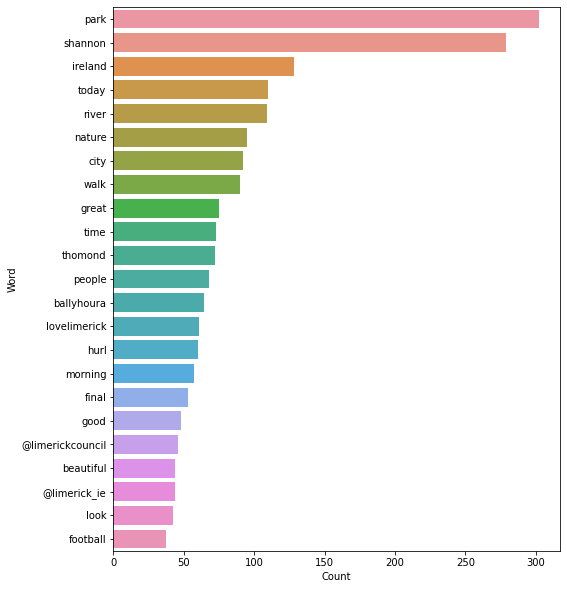

In [17]:
# Draw a bar chart dropping limerick 
plt.figure(figsize=(8,10))
sns.barplot(y= 'Word', x = 'Count', data = df_most_common.drop([0,1]))
plt.show()

Save the cleaned dataframe


In [20]:
filepath = Path('../dataframe/dfc.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath) 